Result Table:
    Threads  Time Taken (sec)  CPU Usage (%)
0         1          0.183761           36.2
1         1          0.127937          100.0
2         1          0.118481          100.0
3         1          0.113454          100.0
4         1          0.105141          100.0
..      ...               ...            ...
795       8          0.057078          100.0
796       8          0.058663          100.0
797       8          0.056376          100.0
798       8          0.055982          100.0
799       8          0.056426          100.0

[800 rows x 3 columns]


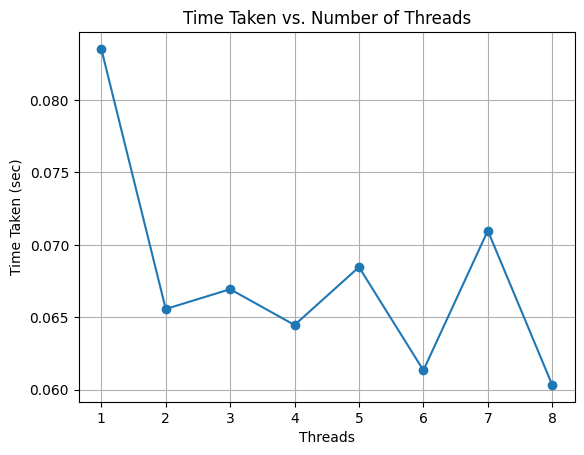

In [2]:
import numpy as np
import time
import psutil
import matplotlib.pyplot as plt
import pandas as pd

def generate_matrices(size):
    constant_matrix = np.random.rand(size, size)
    random_matrices = [np.random.rand(size, size) for _ in range(100)]
    return constant_matrix, random_matrices

def multiply_matrices(constant_matrix, random_matrices, num_threads):
    results = []
    for matrix in random_matrices:
        start_time = time.time()
        # Perform matrix multiplication with the given number of threads
        # You can use any method you prefer for multi-threading, such as multiprocessing or threading in Python
        # Here, we assume a simple sequential multiplication for demonstration
        result = np.dot(matrix, constant_matrix)
        end_time = time.time()
        cpu_usage = psutil.cpu_percent()
        elapsed_time = end_time - start_time
        results.append((num_threads, elapsed_time, cpu_usage))
    return results

def main():
    matrix_size = 1000
    num_threads = [1, 2, 3, 4, 5, 6, 7, 8]
    time_taken = []

    constant_matrix, random_matrices = generate_matrices(matrix_size)

    result_table = pd.DataFrame(columns=['Threads', 'Time Taken (sec)', 'CPU Usage (%)'])

    for t in num_threads:
        results = multiply_matrices(constant_matrix, random_matrices, t)
        # Calculate average time taken
        avg_time = np.mean([result[1] for result in results])
        time_taken.append(avg_time)

        # Record results in the table
        for result in results:
            result_table = pd.concat([result_table, pd.DataFrame([result], columns=['Threads', 'Time Taken (sec)', 'CPU Usage (%)'])], ignore_index=True)

    print("Result Table:")
    print(result_table)

    # Plotting
    plt.plot(num_threads, time_taken, marker='o')
    plt.xlabel('Threads')
    plt.ylabel('Time Taken (sec)')
    plt.title('Time Taken vs. Number of Threads')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


Result Table:
    Threads  Time Taken (sec)   CPU Usage (%)
0         1          0.058885    [46.3, 46.9]
1         1          0.059023  [100.0, 100.0]
2         1          0.059065  [100.0, 100.0]
3         1          0.060504  [100.0, 100.0]
4         1          0.056794  [100.0, 100.0]
..      ...               ...             ...
795       8          0.056714  [100.0, 100.0]
796       8          0.056449  [100.0, 100.0]
797       8          0.056648  [100.0, 100.0]
798       8          0.056477  [100.0, 100.0]
799       8          0.057765  [100.0, 100.0]

[800 rows x 3 columns]


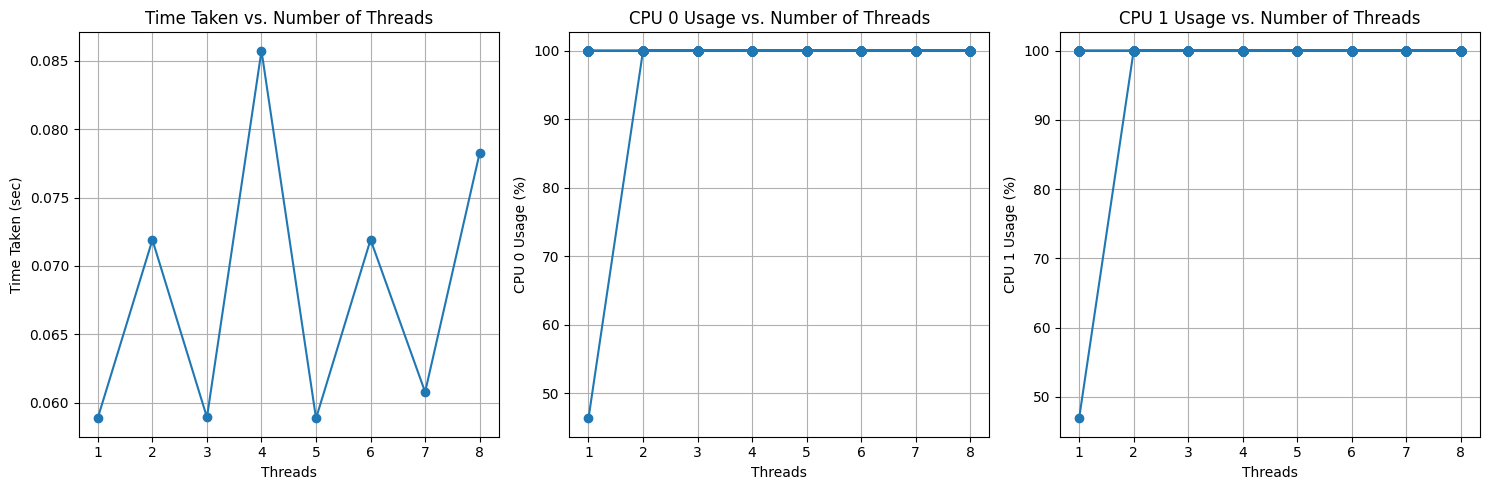

In [3]:
import numpy as np
import time
import psutil
import matplotlib.pyplot as plt
import pandas as pd

def generate_matrices(size):
    constant_matrix = np.random.rand(size, size)
    random_matrices = [np.random.rand(size, size) for _ in range(100)]
    return constant_matrix, random_matrices

def multiply_matrices(constant_matrix, random_matrices, num_threads):
    results = []
    for matrix in random_matrices:
        start_time = time.time()
        # Perform matrix multiplication with the given number of threads
        # You can use any method you prefer for multi-threading, such as multiprocessing or threading in Python
        # Here, we assume a simple sequential multiplication for demonstration
        result = np.dot(matrix, constant_matrix)
        end_time = time.time()
        cpu_usage = psutil.cpu_percent(percpu=True)
        elapsed_time = end_time - start_time
        results.append((num_threads, elapsed_time, cpu_usage))
    return results

def main():
    matrix_size = 1000
    num_threads = [1, 2, 3, 4, 5, 6, 7, 8]
    time_taken = []
    cpu_usage_lists = [[] for _ in range(psutil.cpu_count(logical=True))]  # List to store CPU usage for each core

    constant_matrix, random_matrices = generate_matrices(matrix_size)

    result_table = pd.DataFrame(columns=['Threads', 'Time Taken (sec)', 'CPU Usage (%)'])

    for t in num_threads:
        results = multiply_matrices(constant_matrix, random_matrices, t)
        # Calculate average time taken
        avg_time = np.mean([result[1] for result in results])
        time_taken.append(avg_time)

        # Record results in the table
        for result in results:
            result_table = pd.concat([result_table, pd.DataFrame([result], columns=['Threads', 'Time Taken (sec)', 'CPU Usage (%)'])], ignore_index=True)
            for i, cpu_usage in enumerate(result[2]):
                cpu_usage_lists[i].append(cpu_usage)

    print("Result Table:")
    print(result_table)

    # Plotting Time Taken vs. Number of Threads
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(num_threads, time_taken, marker='o')
    plt.xlabel('Threads')
    plt.ylabel('Time Taken (sec)')
    plt.title('Time Taken vs. Number of Threads')
    plt.grid(True)

    # Plotting CPU Usage for individual cores vs. Number of Threads
    for i, cpu_usage_list in enumerate(cpu_usage_lists):
        plt.subplot(1, 3, i + 2)
        plt.plot(num_threads * 100, cpu_usage_list, marker='o')  # Scaling CPU usage for better visualization
        plt.xlabel('Threads')
        plt.ylabel(f'CPU {i} Usage (%)')
        plt.title(f'CPU {i} Usage vs. Number of Threads')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
